In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_diabetes

In [2]:
data = load_diabetes()

In [3]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df['Target'] = data.target

In [4]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [5]:
df.shape

(442, 11)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['Target'], test_size=0.2, random_state=2)

In [7]:
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
70,-0.001882,-0.044642,-0.069797,-0.012556,-0.000193,-0.009143,0.070730,-0.039493,-0.062913,0.040343
37,-0.009147,-0.044642,0.011039,-0.057314,-0.024960,-0.042963,0.030232,-0.039493,0.017037,-0.005220
170,0.023546,0.050680,-0.020218,-0.036656,-0.013953,-0.015092,0.059685,-0.039493,-0.096433,-0.017646
400,-0.023677,-0.044642,0.045529,0.090730,-0.018080,-0.035447,0.070730,-0.039493,-0.034524,-0.009362
286,-0.038207,-0.044642,-0.054707,-0.077971,-0.033216,-0.086490,0.140681,-0.076395,-0.019197,-0.005220
...,...,...,...,...,...,...,...,...,...,...
299,0.038076,0.050680,-0.013751,-0.015999,-0.035968,-0.021982,-0.013948,-0.002592,-0.025952,-0.001078
22,-0.085430,-0.044642,-0.004050,-0.009113,-0.002945,0.007767,0.022869,-0.039493,-0.061177,-0.013504
72,0.063504,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084495,-0.017646
15,-0.052738,0.050680,-0.018062,0.080401,0.089244,0.107662,-0.039719,0.108111,0.036056,-0.042499


In [8]:
coefs = []
r2_scores = []

for i in [0,10,100,1000]:
    reg = Ridge(alpha= i)
    
    reg.fit(X_train,y_train)
    coefs.append(reg.coef_.tolist())
    
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))
    

In [9]:
coefs

[[-9.160884832463475,
  -205.46225987708985,
  516.6846238313876,
  340.6273410788926,
  -895.5436086743995,
  561.2145330559318,
  153.88478595252084,
  126.73431596154892,
  861.1213995462006,
  52.419828358574875],
 [21.17400371774996,
  1.6597961347385402,
  63.659771901799736,
  48.4932400316976,
  18.421491990472823,
  12.875448426495618,
  -38.91543505723751,
  38.84246372206306,
  61.61240510619143,
  35.50535526561317],
 [2.8589794382553477,
  0.6294520371235353,
  7.540604496094514,
  5.8499966438735935,
  2.7108785152669634,
  2.142134389296116,
  -4.83404696857779,
  5.108223239548698,
  7.44846624335517,
  4.576128672131118],
 [0.2957255603009537,
  0.06929028636932703,
  0.7690038061994642,
  0.597829288703144,
  0.2828995133533437,
  0.22593550596063294,
  -0.4956069088303585,
  0.5270313419211987,
  0.7614974792951518,
  0.47102906582326076]]

In [10]:
r2_scores

[0.43993876600246407,
 0.15214316037162345,
 0.0103781053510128,
 -0.010136671491364435]

# How Coefficient being affected

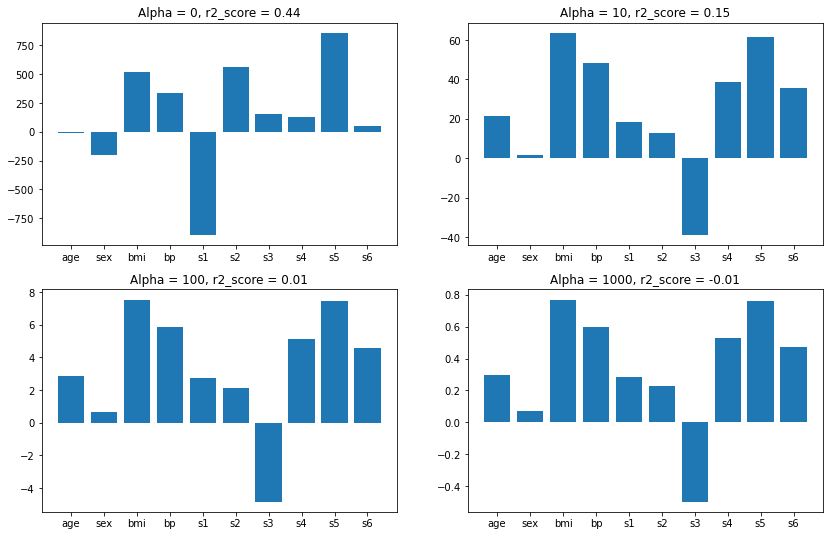

In [11]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0, r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 10, r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 100, r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 1000, r2_score = {}'.format(round(r2_scores[3],2)))
plt.show()

# Higher values are impacted more

In [12]:
alpha = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
coefs = []

for i in alpha:
    reg = Ridge(alpha= i)
    
    reg.fit(X_train,y_train)
    coefs.append(reg.coef_.tolist())
    

In [13]:
input_array = np.array(coefs)

In [14]:
coef_df = pd.DataFrame(input_array, columns=data.feature_names)
coef_df['alpha'] = alpha
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.160885,-205.462260,516.684624,340.627341,-895.543609,561.214533,153.884786,126.734316,861.121400,52.419828
0.0001,-9.118336,-205.337133,516.880570,340.556792,-883.415291,551.553259,148.578680,125.355917,856.480254,52.467627
0.0010,-8.763583,-204.321125,518.371729,339.975385,-787.690766,475.274718,106.786540,114.632063,819.739542,52.872100
0.0100,-6.401088,-198.669767,522.048548,336.348363,-383.709187,152.663678,-66.060583,75.611090,659.869402,55.828128
0.1000,6.642753,-172.242166,485.523872,314.682122,-72.939323,-80.590053,-174.466515,83.616653,484.363285,73.584154
1.0000,42.242217,-57.305508,282.170831,198.061386,14.363544,-22.551274,-136.930053,102.023193,260.104308,98.552274
10.0000,21.174004,1.659796,63.659772,48.493240,18.421492,12.875448,-38.915435,38.842464,61.612405,35.505355
100.0000,2.858979,0.629452,7.540604,5.849997,2.710879,2.142134,-4.834047,5.108223,7.448466,4.576129
1000.0000,0.295726,0.069290,0.769004,0.597829,0.282900,0.225936,-0.495607,0.527031,0.761497,0.471029


In [15]:
alpha = [0,0.0001,0.0005,0.001,0.1,0.5,1,5,10]
coefs = []

for i in alpha:
    reg = Ridge(alpha= i)
    
    reg.fit(X_train,y_train)
    coefs.append(reg.coef_.tolist())
    
input_array1 = np.array(coefs).T

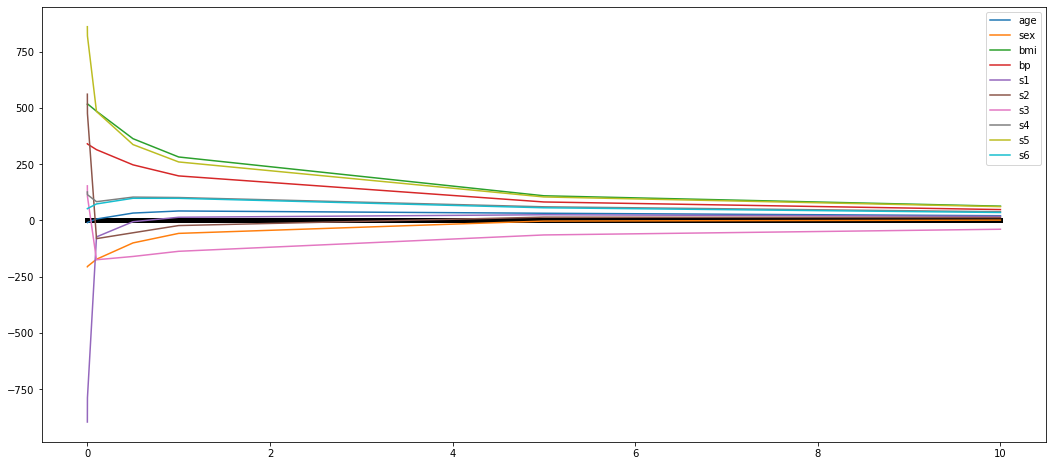

In [16]:
plt.figure(figsize=(18,8))
plt.plot(alpha, np.zeros(len(alpha)),'k',linewidth=5)

for i in range(input_array1.shape[0]):
    plt.plot(alpha,input_array1[i],label= data.feature_names[i])
plt.legend()             

# Bias Variance Tradeoff

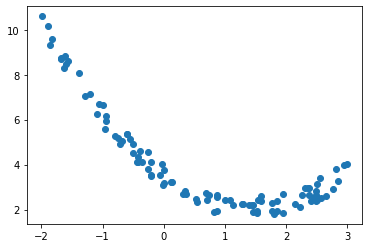

In [17]:
m = 100

X = 5 * np.random.rand(m, 1) - 2

y = 0.7 * X ** 2 - 2 * X + 3 + np.random.rand(m, 1)

plt.scatter(X,y)
plt.show()

In [18]:
y.shape

(100, 1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y.reshape(100), test_size=0.2, random_state=2)

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=15)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [21]:
from mlxtend.evaluate import bias_variance_decomp

alpha = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alpha:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, loss='mse',
        random_seed=123)
    
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)
    

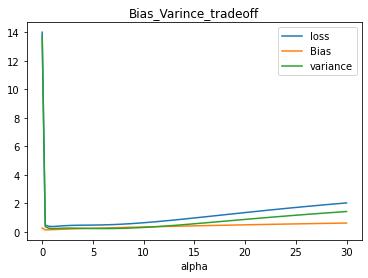

In [22]:
plt.plot(alpha,loss, label='loss')
plt.plot(alpha,bias, label='Bias')
plt.plot(alpha,variance, label='variance')
plt.legend()
plt.xlabel('alpha')
plt.title('Bias_Varince_tradeoff')
plt.show()

## 4. Effect of Regularization on Loss function

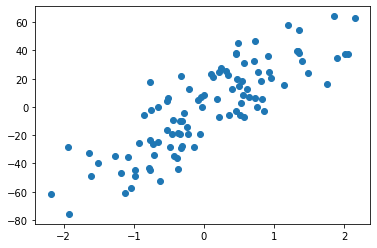

In [23]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20, random_state=13)
plt.scatter(X,y)

In [24]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [25]:
def cal_loss(m,alpha):
    return np.sum((y - m * X.ravel() + 2.29)**2) + alpha * m**2

In [26]:
def predict(m):
    return m*X - 2.29

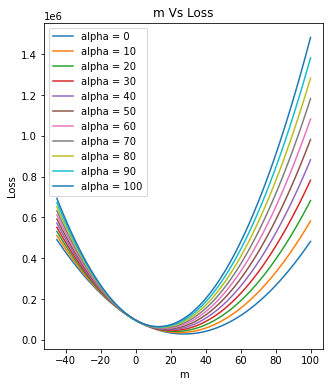

In [41]:
m = np.linspace(-45,100,100)

plt.figure(figsize=(5,6))

for j in range(0,101,10):
    loss = []
    
    for i in range(m.shape[0]):
        
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
        
    plt.plot(m, loss, label = 'alpha = {}'.format(j))
    
plt.legend()
plt.xlabel('m')
plt.ylabel('Loss')
plt.title('m Vs Loss')
plt.show()

### for 2 coefficients
<img src='https://explained.ai/regularization/images/lagrange-animation.gif'>

# Why called Ridge
- Hard Contraint Ridge regression


ans - since solution min coef meets at perimeter or ridge of OLS methos

# Use case of ridge regression

- minmum 2 variable or mostly maximum number of input variable